In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib notebook
import sys
sys.settrace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import struct
import array
import os
import glob
import h5py
from scipy.interpolate import griddata
from scipy import integrate

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
plt.rcParams['font.size'] = '20'

from importlib import reload

In [2]:
import athena_read

In [2]:
def FitBlackBody(nu_t):
  integral = 0.0;
  nu_2 = nu_t * nu_t;
  nu_3 = nu_t * nu_2;
  if nu_t < 1.5:
    integral = 0.051329911273422 * nu_3 -0.019248716727533 * nu_t * nu_3 + 0.002566495563671 * nu_2 * nu_3;
  elif nu_t < 18.6:
    exp_nu = exp(-nu_t);
    integral = -0.156915538762850 * exp_nu * (nu_3 + 2.69 * nu_2 + 6.714 * nu_t) + 1.000009331428801*(1- exp_nu);
  else:
    integral = 1.0 - 192.1*exp(-0.9014*nu_t)

  return integral;
def BlackBody(nu_t):
  spec=(15/np.pi**4.0)*nu_t**3/(exp(nu_t)-1)

  return spec;

In [3]:
def PlotProfile(datax, datay, xmin, xmax, ymin, ymax,  ylabel, label1, filename, xlabel='$r/r_g$', logscale=0, 
                xlogscale=0,datay1_2=None, datay1_3=None, datax2=None, datay2=None, datay2_2=None, datay2_3=None, 
                datax3=None, datay3=None, datay3_2=None, datay3_3=None, datax4=None, datay4=None, 
                datax5=None, datay5=None, label2='', label3='', label4='', label5='',title=None,leg_loc=None):
    plots, axes = plt.subplots(figsize=(9,11),dpi=300)
    plt.xlabel(xlabel, size = 30)
    plt.ylabel(ylabel, size = 30)
    plt.subplots_adjust(left=0.16,right=0.88,top=0.9,bottom=0.1)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    if logscale > 0:
      axes.set_yscale('log')
    if xlogscale > 0:
      axes.set_xscale('log')
    if title is not None:
      plt.title(title,size=20)

    plt.plot(datax,datay,color='black',marker=' ',fillstyle='none',markersize=8,label=label1,linewidth=3.0)
    if datay1_2 is not None:
      plt.scatter(datax,datay1_2,color='red',marker='o',s=40)
    if datay1_3 is not None:
      plt.plot(datax,datay1_3,color='black',linestyle='dashed',linewidth=4.0)
    if datay2 is not None:
      plt.plot(datax2,datay2,color='red',label=label2,linewidth=2.0,alpha=1.0,marker='o',
               linestyle='dashed',markersize=10,fillstyle='none')
    if datay2_2 is not None:
      plt.plot(datax2,datay2_2,color='black',linestyle='dashed',linewidth=2.0,alpha=1.0)
    if datay2_3 is not None:
      plt.plot(datax2,datay2_3,color='red',linestyle='dashed',linewidth=4.0)
    if datay3 is not None:
      plt.plot(datax3,datay3,color='green',label=label3,marker='s',fillstyle='none',markersize=8,linewidth=3.0)
    if datay3_2 is not None:
      plt.plot(datax3,datay3_2,color='black',linestyle='dashed',linewidth=2.0,alpha=1.0)
    if datay3_3 is not None:
      plt.plot(datax3,datay3_3,color='green',linestyle='dashed',linewidth=4.0)
    if datay4 is not None:
      plt.plot(datax4,datay4,color='red',linestyle='dotted',label=label4,linewidth=3.0)
    if datay5 is not None:
      plt.plot(datax5,datay5,color=tableau20[0],label=label5,linewidth=2.0) 
    if leg_loc is not None:
      plt.legend(loc="best",bbox_to_anchor=leg_loc,frameon=False)
    axes.set_aspect('auto')
#    axes.yaxis.set_tick_params(labelsize=25)
#    axes.xaxis.set_tick_params(labelsize=25)
    plt.savefig(filename)
    plt.close(plots)


In [152]:
#files=sorted(glob.glob('Data/thermal*athdf'))
#num_file=len(files)

In [53]:
Prat=43.6907
Crat=5694.76
count=0
fi=715
filename='average_'+'{:05d}'.format(fi)+'.athdf'


f=h5py.File(filename, 'r')

quantities=f.keys()
radius=f['x1v'][()]
theta=f['x2v'][()]
x2v=f['x2v'][()]
theta=theta*180/np.pi
tgas=f['tgas'][()]
sigma_a=f['Sigma_a'][()]
sigma_s=f['Sigma_s'][()]
sigma_p=f['Sigma_p'][()]
rho=f['rho'][()]
Er=f['Er'][()]
Fr01Sigma=f['Fr01Sigma'][()]
Fr02Sigma=f['Fr02Sigma'][()]
Fr02kappa=f['Fr02kappa'][()]
Fr01=f['Fr01'][()]
Fr02=f['Fr02'][()]
gm=0.5*Crat*Crat
rhovphi=f['RhoVphi'][()]
Tr=Er**0.25
Pr=Prat*Er/3.0
pgas=f['press'][()]
vkep=(gm*radius/(radius-1)**2)**0.5
vphi=rhovphi/rho


<IPython.core.display.Javascript object>


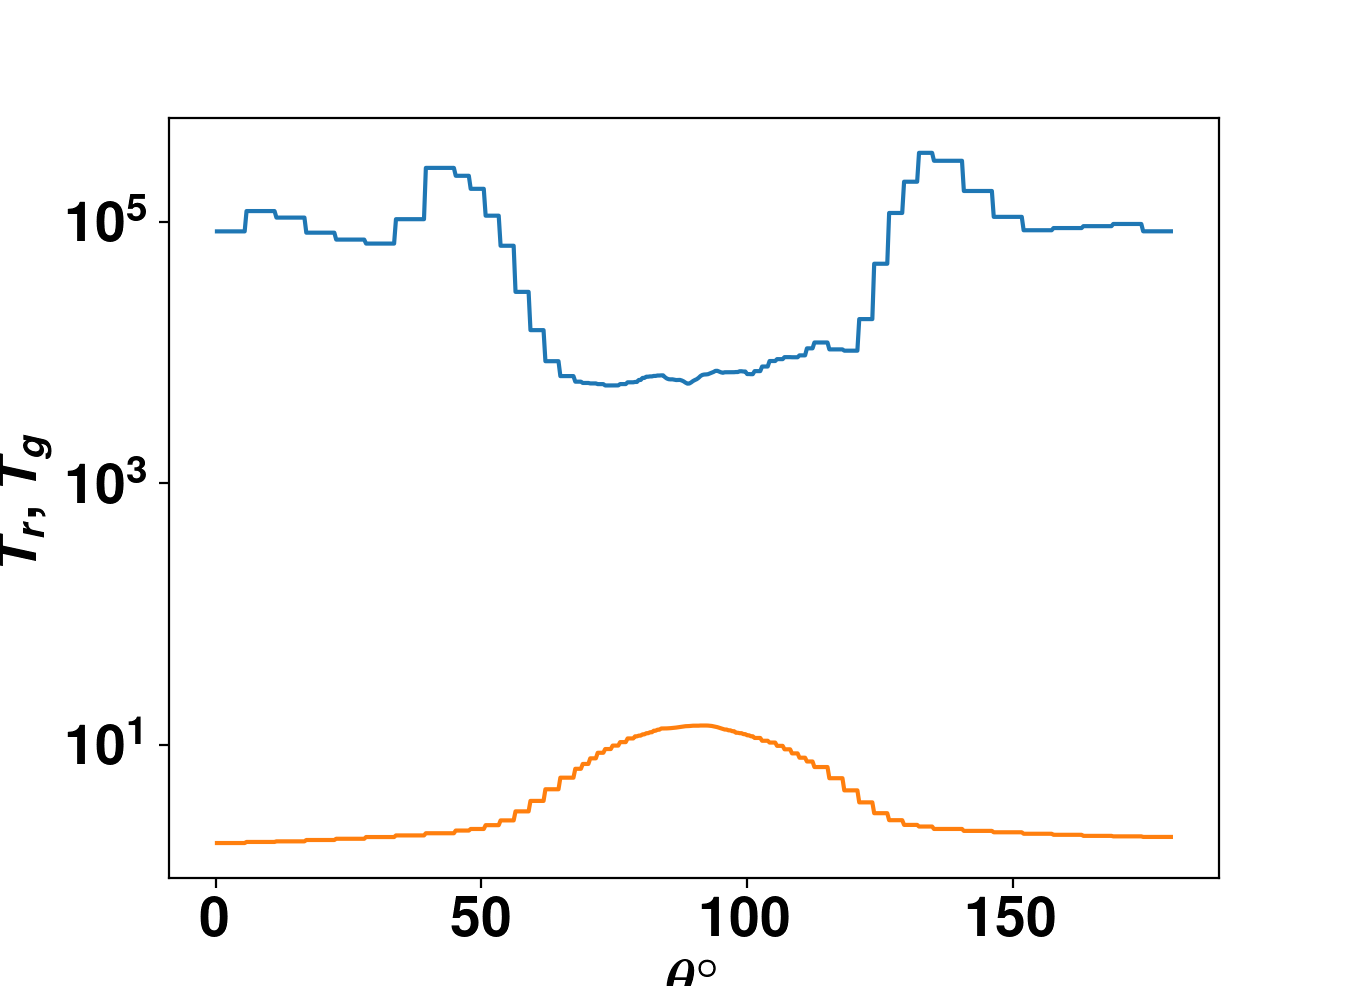

In [16]:
r1=60
r_index=np.abs(radius-r1).argmin()
plots, axes = plt.subplots(figsize=(7,5),dpi=100)
axes.set_yscale('log')
axes.set_ylabel('$T_r,T_g$')
axes.set_xlabel('$\\theta^{\\circ}$')
plt.plot(theta,tgas[:,r_index])
plt.plot(theta,Tr[:,r_index])

<IPython.core.display.Javascript object>


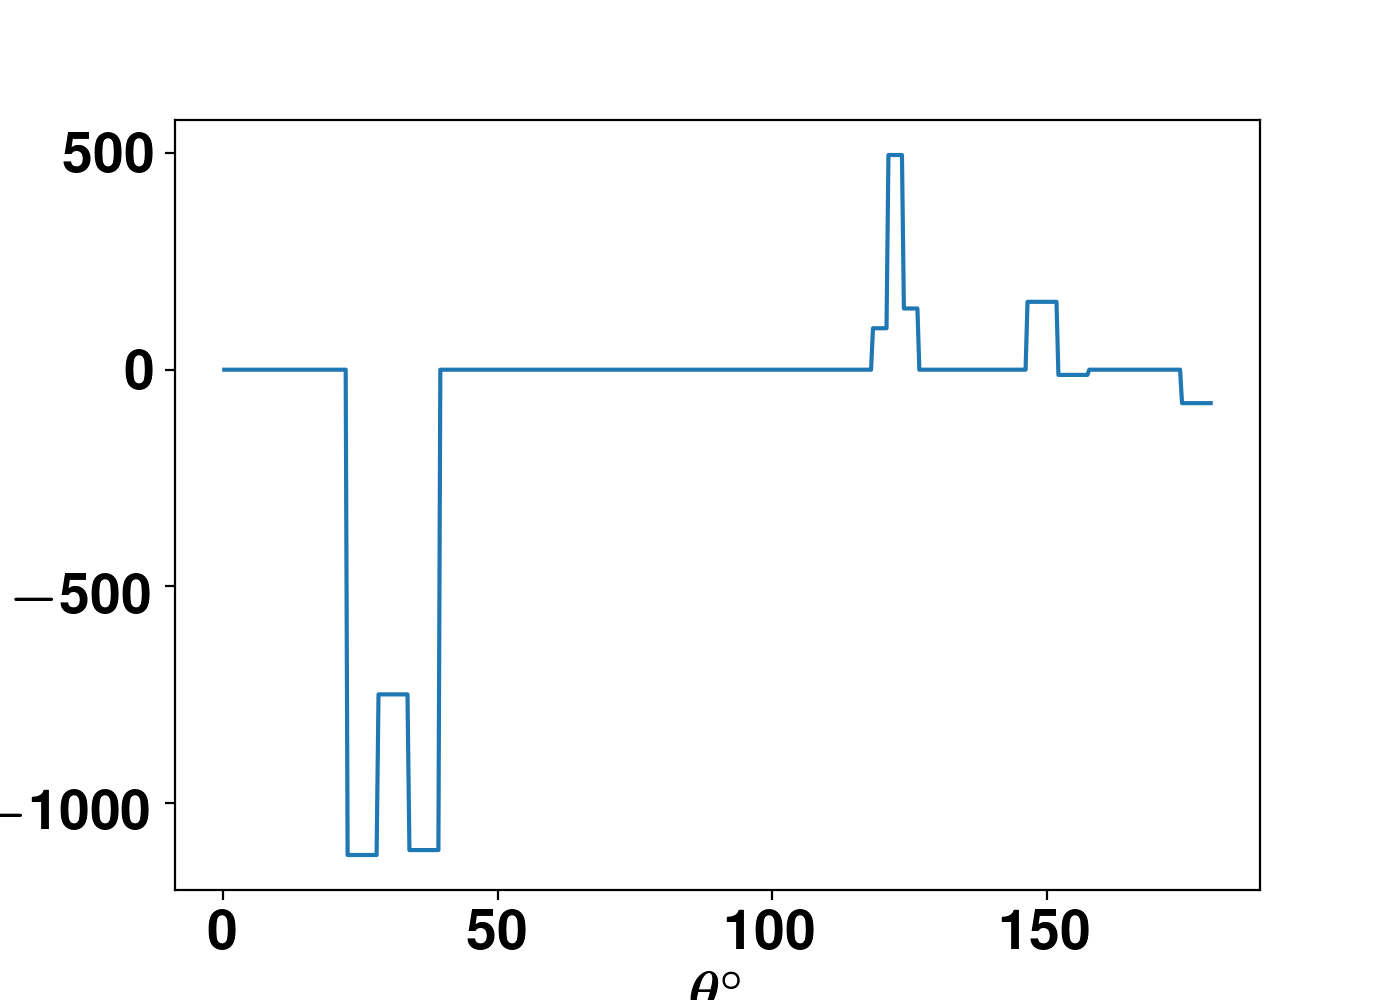

In [54]:
r1=60
r_index=np.abs(radius-r1).argmin()
plots, axes = plt.subplots(figsize=(7,5),dpi=100)
#axes.set_yscale('log')
axes.set_ylabel('$P_r,P_g$')
axes.set_xlabel('$\\theta^{\\circ}$')
#plt.plot(theta,sigma_a[:,r_index])
plt.plot(theta,Fr02kappa[:,r_index])

<IPython.core.display.Javascript object>


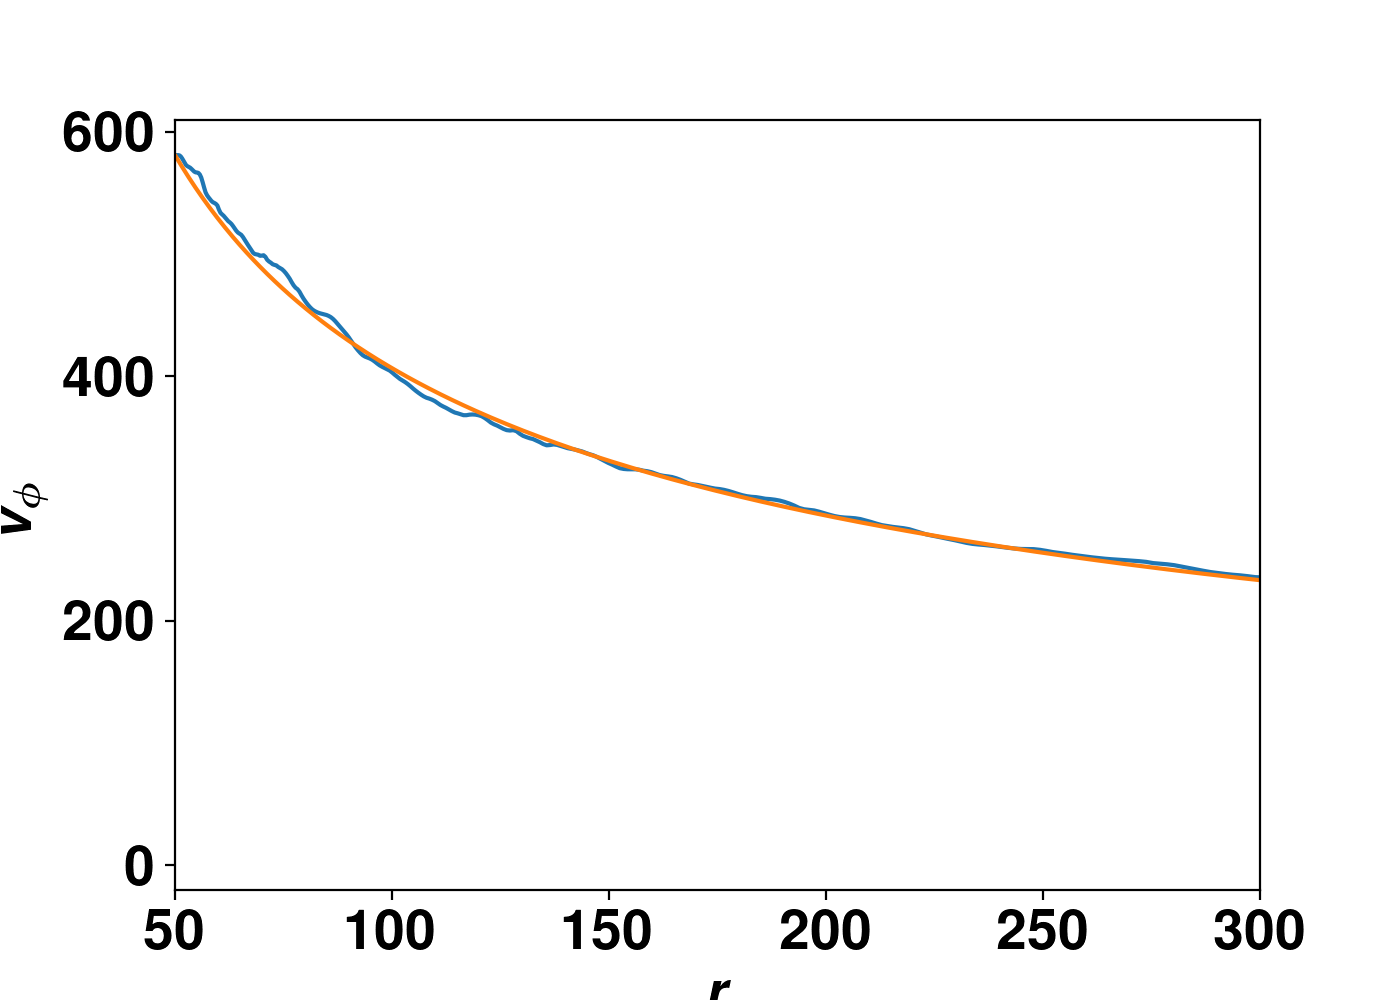

In [35]:
t_pos=90
t_index=np.abs(theta-t_pos).argmin()
plots, axes = plt.subplots(figsize=(7,5),dpi=100)
#axes.set_yscale('log')
axes.set_ylabel('$v_{\\phi}$')
axes.set_xlabel('$r$')
axes.set_xlim([50,300])
#plt.plot(theta,sigma_a[:,r_index])
plt.plot(radius,vphi[t_index,:])
plt.plot(radius,vkep)

<IPython.core.display.Javascript object>


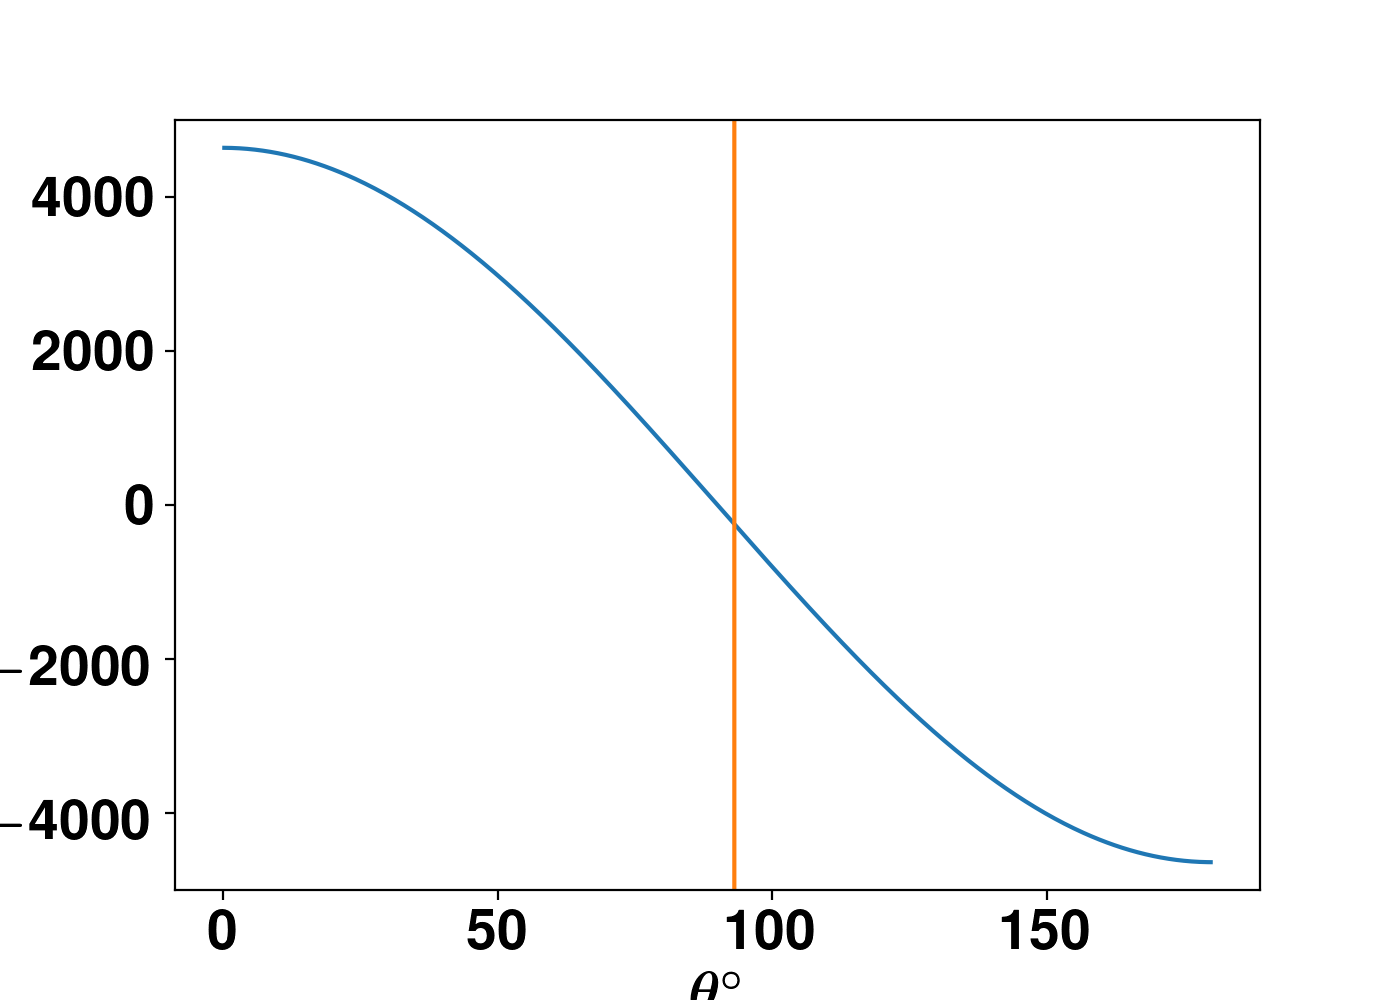

In [51]:
r1=60
r_index=np.abs(radius-r1).argmin()
grav_vert=gm*np.cos(x2v)/(radius[r_index]-1)**2.0
#a_r=Prat*Fr02Sigma[:,r_index]/rho[:,r_index]
a_r=Prat*Fr02[:,r_index]*sigma_s[:,r_index]/rho[:,r_index]
plots, axes = plt.subplots(figsize=(7,5),dpi=100)
#axes.set_yscale('log')
axes.set_ylim([-5000,5000])
axes.set_ylabel('$P_r,P_g$')
axes.set_xlabel('$\\theta^{\\circ}$')
#plt.plot(theta,sigma_a[:,r_index])
plt.plot(theta,grav_vert)
plt.plot(theta,-a_r)